In [ ]:
!mkdir -p /root/.kaggle

In [ ]:
import shutil
shutil.move('kaggle.json', '/root/.kaggle/')

'/root/.kaggle/kaggle.json'

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d natezhang123/social-anxiety-dataset

Dataset URL: https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset
License(s): CC0-1.0
  0% 0.00/403k [00:00<?, ?B/s]
100% 403k/403k [00:00<00:00, 595MB/s]


In [ ]:
!unzip /content/social-anxiety-dataset.zip

Archive:  /content/social-anxiety-dataset.zip
  inflating: enhanced_anxiety_dataset.csv  
  inflating: family_anxiety_14_dataset.csv  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/enhanced_anxiety_dataset.csv')
df

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


In [ ]:
df.shape

(11000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [ ]:
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


<Axes: xlabel='Caffeine Intake (mg/day)'>

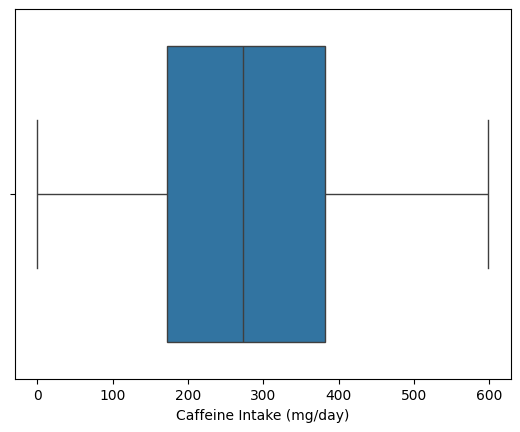

In [ ]:
# sns.boxplot(df=df,x=df['Caffeine Intake (mg/day)'])
sns.boxplot(x='Caffeine Intake (mg/day)', data=df)

In [ ]:
Q1=df['Caffeine Intake (mg/day)'].quantile(0.25)
Q3=df['Caffeine Intake (mg/day)'].quantile(0.75)
IQR=Q3-Q1
print('Q1 is: ',Q1)
print('Q3 is: ',Q3)
print('IQR is: ',IQR)
Lower = Q1 - IQR
Upper = Q3 + IQR
print('Lower is: ',Lower, 'Upper is: ',Upper)

Q1 is:  172.0
Q3 is:  382.0
IQR is:  210.0
Lower is:  -38.0 Upper is:  592.0


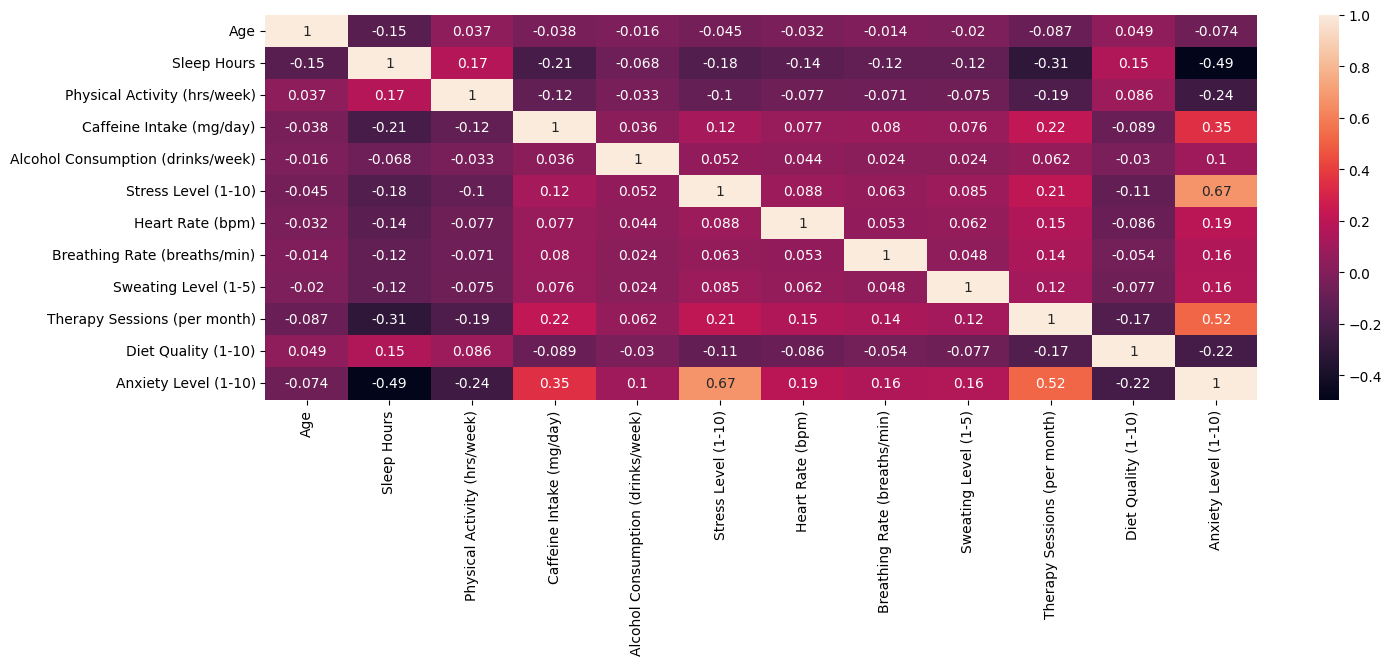

In [ ]:
plt.figure(figsize=(16,5))
numeric_id = df.select_dtypes(include=['number'])
sns.heatmap(numeric_id.corr(), annot = True)
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

In [ ]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

In [ ]:
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [ ]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Occupation,0
Sleep Hours,0
Physical Activity (hrs/week),0
Caffeine Intake (mg/day),0
Alcohol Consumption (drinks/week),0
Smoking,0
Family History of Anxiety,0
Stress Level (1-10),0


In [ ]:
df.drop_duplicates()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,Yes,No,10,114,14,4,No,Yes,3,Yes,7,5.0
1,46,Other,Nurse,6.2,5.7,200,8,Yes,Yes,1,62,23,2,Yes,No,2,No,8,3.0
2,64,Male,Other,5.0,3.7,117,4,No,Yes,1,91,28,3,No,No,1,Yes,1,1.0
3,20,Female,Scientist,5.8,2.8,360,6,Yes,No,4,86,17,3,No,No,0,No,1,2.0
4,49,Female,Other,8.2,2.3,247,4,Yes,No,1,98,19,4,Yes,Yes,1,No,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,23,Female,Engineer,6.1,3.1,566,9,Yes,No,8,91,28,1,Yes,Yes,1,No,3,6.0
10996,50,Other,Teacher,6.6,3.6,64,17,Yes,No,7,95,17,3,No,No,2,No,7,3.0
10997,29,Male,Nurse,6.7,6.9,159,14,No,No,8,72,16,1,Yes,Yes,2,Yes,7,4.0
10998,53,Other,Artist,5.7,2.7,248,8,No,No,4,112,28,3,Yes,Yes,1,Yes,2,4.0


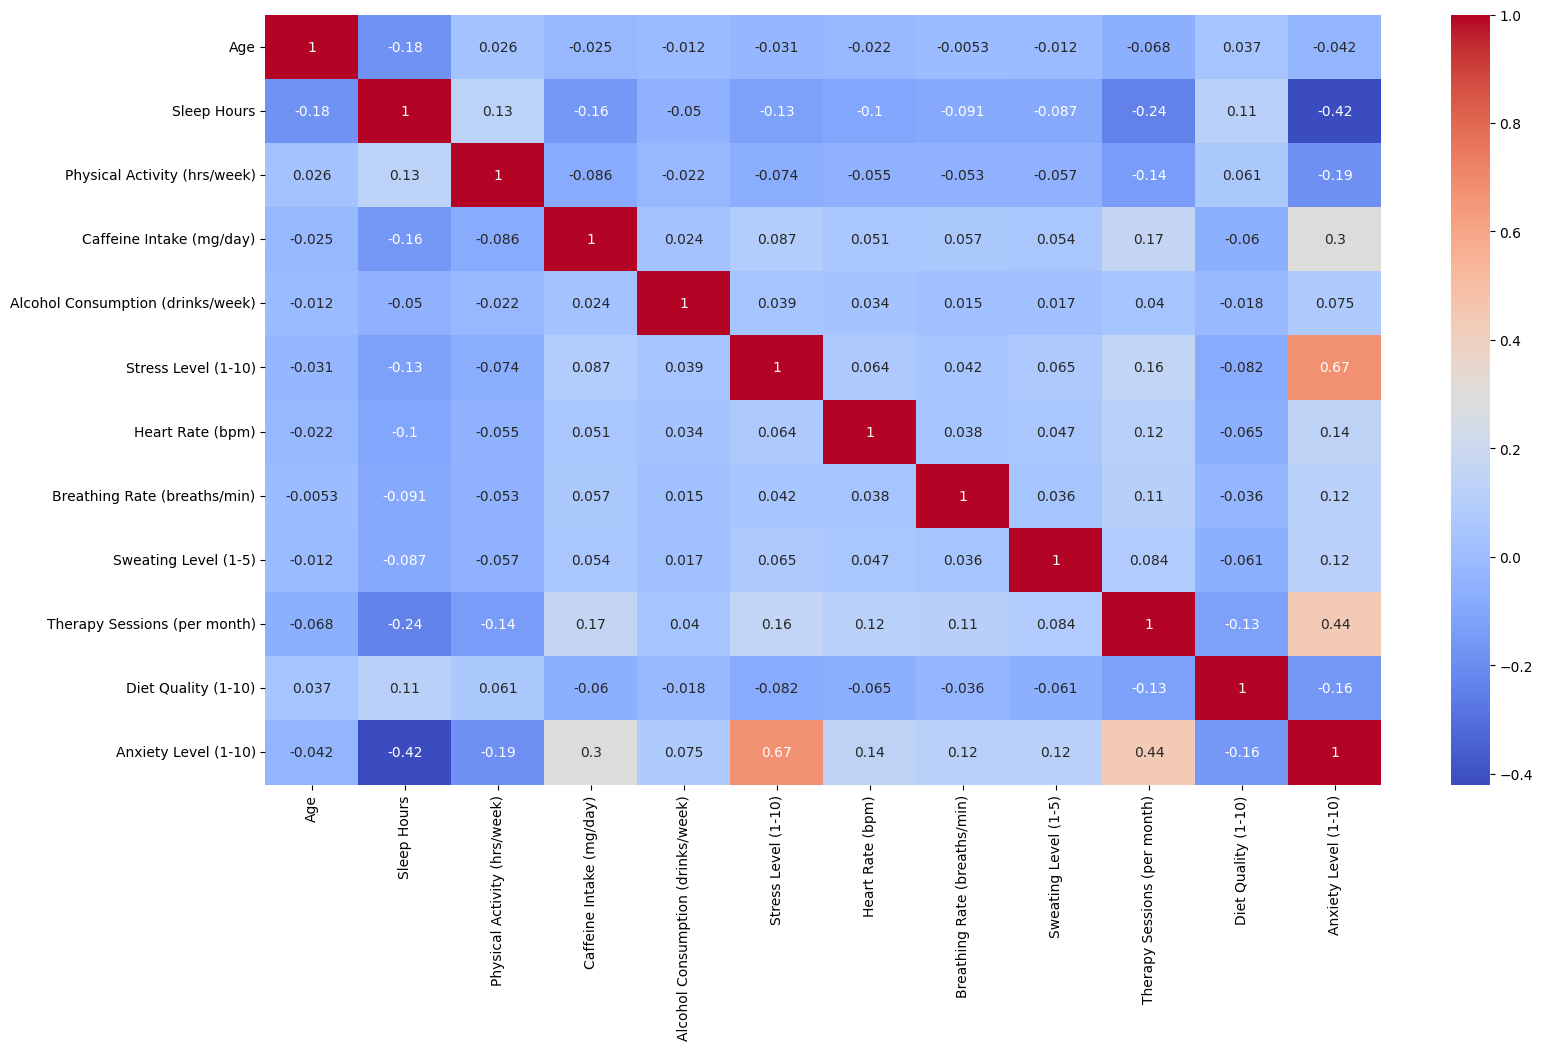

In [ ]:
plt.figure(figsize=(18, 10))
numeric_id = df.select_dtypes(include=['number'])
sns.heatmap(numeric_id.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
X = df.drop('Anxiety Level (1-10)', axis=1)
y = df['Anxiety Level (1-10)'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
cat_features = X_train.select_dtypes(exclude = [np.number]).columns
num_features = X_train.select_dtypes(include = [np.number]).columns

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

In [ ]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())

])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder= 'passthrough')

In [ ]:
full_pipeline=Pipeline([
    ('preprocessing',transformer),
    ('estimator',rfc)

])

In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate...
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                ('estimator', RandomForestClassifier(random_state=42))])

In [ ]:
full_pipeline.score(X_train,y_train), full_pipeline.score(X_test,y_test)

(1.0, 0.33941947565543074)

In [ ]:
X_train_transformed_df = pd.DataFrame(data = transformer.fit_transform(X_train), columns = transformer.get_feature_names_out())
X_test_transformed_df = pd.DataFrame(data = transformer.transform(X_test), columns = transformer.get_feature_names_out())

In [ ]:
X_train_transformed_df

,num__Age,num__Sleep Hours,num__Physical Activity (hrs/week),num__Caffeine Intake (mg/day),num__Alcohol Consumption (drinks/week),num__Stress Level (1-10),num__Heart Rate (bpm),num__Breathing Rate (breaths/min),num__Sweating Level (1-5),num__Therapy Sessions (per month),...,cat__Smoking_No,cat__Smoking_Yes,cat__Family History of Anxiety_No,cat__Family History of Anxiety_Yes,cat__Dizziness_No,cat__Dizziness_Yes,cat__Medication_No,cat__Medication_Yes,cat__Recent Major Life Event_No,cat__Recent Major Life Event_Yes
0,-0.109291,1.093916,0.003624,0.179417,-1.338866,1.116335,-0.723354,0.230158,-1.470603,-0.143900,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.259477,-1.868717,-0.269856,-0.796015,-0.111105,-0.258185,0.314592,-1.125712,-1.470603,-1.105711,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,-1.310783,0.501389,-0.324552,-0.858721,0.941262,-1.289075,0.083937,-0.157233,-0.043359,0.337005,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.710037,0.416743,-0.707424,-0.287397,-0.637288,-0.601815,1.294873,-0.350929,-1.470603,-1.105711,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
4,-1.536063,-1.868717,-0.980903,1.802813,0.064289,0.772705,0.429919,-0.157233,-0.043359,3.222438,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8537,-0.634944,-1.022251,-1.527863,0.200319,0.239684,0.085445,-0.608027,-1.319407,-1.470603,-1.105711,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
8538,1.768042,1.009269,-1.199687,0.931892,-0.461894,0.085445,-1.472981,0.036462,-0.756981,-0.143900,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
8539,-0.860224,-0.260431,0.550584,0.945827,-1.514261,0.085445,-1.472981,-0.157233,-1.470603,0.337005,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
8540,-0.409664,0.078156,-1.582559,0.144580,0.941262,1.116335,-1.357654,-0.932016,-1.470603,-1.105711,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
# rfc.fit(X_train_transformed_df, y_train)

In [ ]:
# rfc.score(X_test_transformed_df, y_test)

In [ ]:
# rfc.score(X_train_transformed_df, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

clf_rf = Pipeline(steps=[
    ('preprocessor', transformer),  # Preprocessing mərhələsi
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [ ]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (...
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred_rf = clf_rf.predict(X_test)

In [ ]:
X_test.shape

(2136, 18)

In [ ]:
accuracy_score(y_test, y_pred_rf)

0.33941947565543074

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf_logistic = Pipeline(steps=[
    ('transformer', transformer),
    ('classifier', LogisticRegression(random_state=42, max_iter = 1000))
])

In [ ]:
clf_logistic.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (b...
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
X_train_clf_pred = clf_logistic.predict(X_train)
X_test_clf_pred = clf_logistic.predict(X_test)

In [ ]:
accuracy_score(X_train_clf_pred, y_train)

0.3995551393116366

In [ ]:
accuracy_score(X_test_clf_pred, y_test)

0.38764044943820225

In [ ]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred_rf)
r_squared

0.6283754066701204

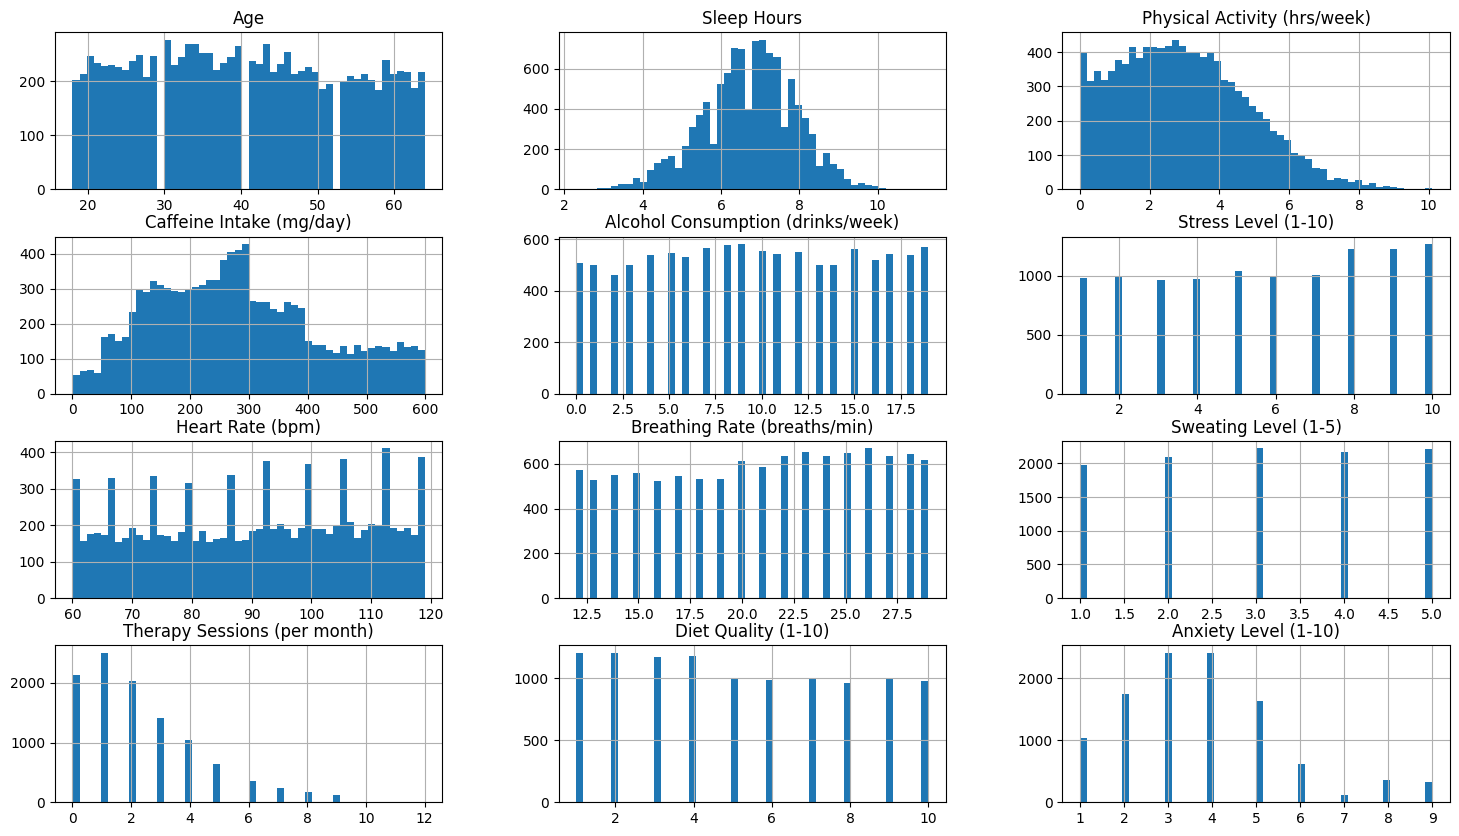

In [ ]:
df.hist(bins=50, figsize=(18, 10))
plt.show()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [ ]:
estimator=RandomForestRegressor()
model=Pipeline([
    ('preprocessing',transformer),
    ('estimator2',estimator)

])

In [ ]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Sleep Hours', 'Physical Activity (hrs/week)',
       'Caffeine Intake (mg/day)', 'Alcohol Consumption (drinks/week)',
       'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate...
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Occupation', 'Smoking', 'Family History of Anxiety',
       'Dizziness', 'Medication', 'Recent Major Life Event'],
      dtype='object'))])),
                ('estimator2', RandomForestRegressor())])

In [ ]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.9582948341562436, 0.7204003426966339)

In [ ]:
# categorical_cols = X_train.select_dtypes(include=['object']).columns
# numerical_cols = X_train.select_dtypes(exclude=['object']).columns

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#     ],
#     remainder='passthrough' )

In [ ]:
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor())
# ])

In [ ]:
# model.fit(X_train, y_train)

In [ ]:
# model.score(X_train, y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train.columns

Index(['Age', 'Gender', 'Occupation', 'Sleep Hours',
       'Physical Activity (hrs/week)', 'Caffeine Intake (mg/day)',
       'Alcohol Consumption (drinks/week)', 'Smoking',
       'Family History of Anxiety', 'Stress Level (1-10)', 'Heart Rate (bpm)',
       'Breathing Rate (breaths/min)', 'Sweating Level (1-5)', 'Dizziness',
       'Medication', 'Therapy Sessions (per month)', 'Recent Major Life Event',
       'Diet Quality (1-10)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()
label_encoders = {}
for col in X_train_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])
    X_test_encoded[col] = le.transform(X_test_encoded[col])
    label_encoders[col] = le

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train_encoded, y_train)

print("Train R^2 Score:", rfr.score(X_train_encoded, y_train))
print("Test R^2 Score:", rfr.score(X_test_encoded, y_test))

Train R^2 Score: 0.9579316385456635
Test R^2 Score: 0.7188537817539058
